# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [1]:
import numpy as np
import os
#from scipy.misc import imread, imresize
import datetime
import os

We set the random seed so that the results don't vary drastically.

In [2]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
tf.random.set_seed(30)

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00060.png


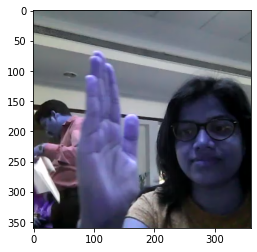

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00062.png


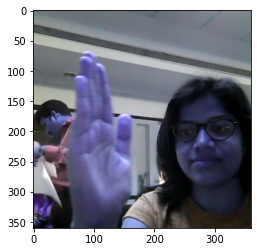

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00064.png


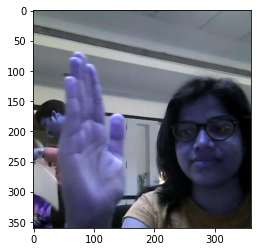

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00066.png


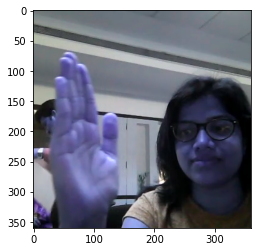

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00068.png


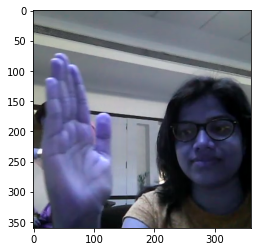

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00070.png


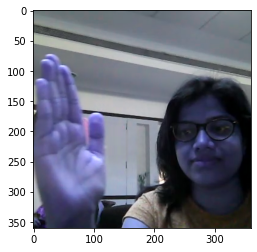

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00012.png


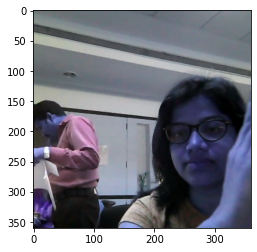

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00014.png


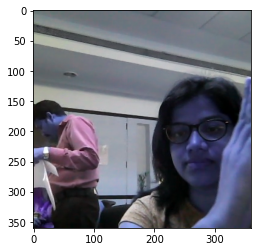

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00016.png


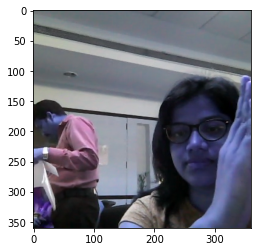

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00018.png


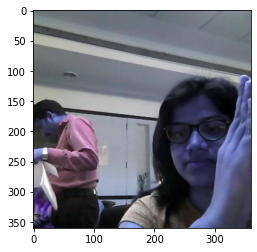

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00020.png


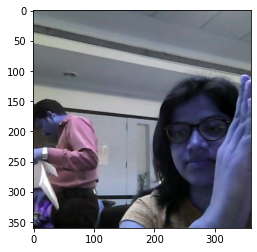

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00022.png


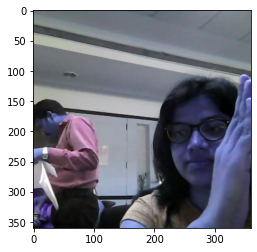

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00024.png


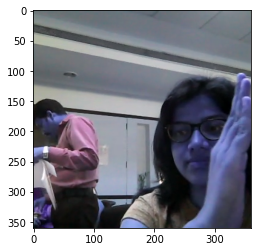

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00026.png


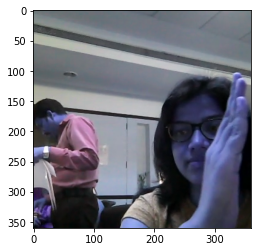

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00028.png


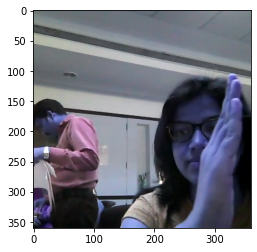

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00030.png


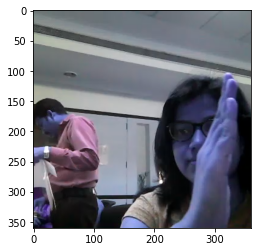

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00032.png


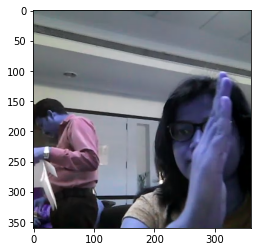

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00034.png


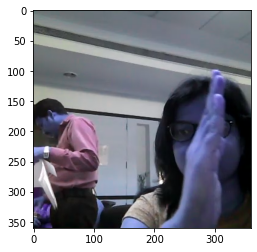

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00036.png


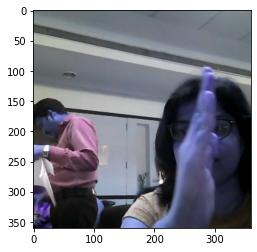

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00038.png


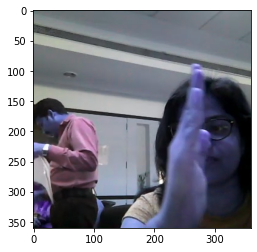

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00040.png


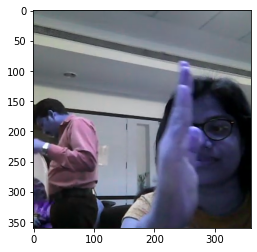

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00042.png


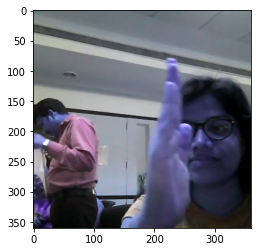

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00044.png


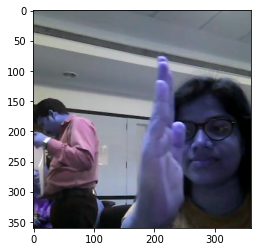

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00046.png


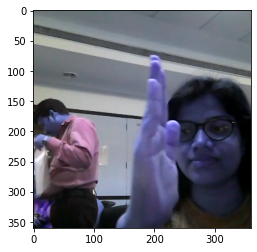

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00048.png


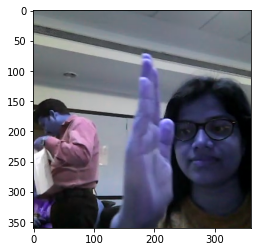

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00050.png


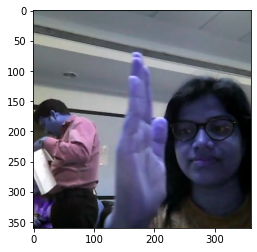

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00052.png


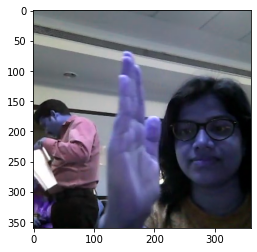

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00054.png


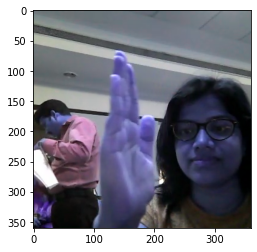

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00056.png


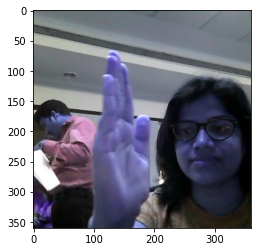

datasets/Project_data/train//WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00058.png


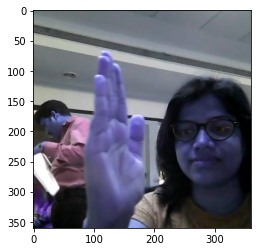

1 30


In [3]:
path='datasets/Project_data/train/'
count=0
for file in os.listdir(path):
  count+=1
  c=0
  for img in os.listdir(path+'/'+file):
    p=path+'/'+file+'/'+img
    print(p)
    im = cv2.imread(p)
    plt.imshow(im)
    plt.show()
    c+=1
  break
print(count,c)

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [4]:
train_doc = np.random.permutation(open('datasets/Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('datasets/Project_data/val.csv').readlines())
batch_size = 40 #experiment with the batch size

In [5]:
train_doc.size

663

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [6]:
def generator(source_path, folder_list, batch_size):
    x = 20 # number of frames
    y = 160 # image width
    z = 160 # image height

    print( 'Source path = ', source_path, '; batch size =', batch_size)
    img_idx = np.round(np.linspace(0,30-1,20)).astype(int) #create a list of image numbers you want to use for a particular video
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(t)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes

                    temp = cv2.resize(image,(160,160))

                    
                    batch_data[folder,idx,:,:,0] = (temp[:,:,0])/255 #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = (temp[:,:,1])/255 #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = (temp[:,:,2])/255 #normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        remaining_seq=len(t)%batch_size
        
        if (remaining_seq != 0):
            #print("Batch: ",num_batches+1,"Index:", batch_size)
            batch_size_1 = remaining_seq
            batch_data = np.zeros((batch_size_1,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size_1,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size_1): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch_size_1*batch)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch_size_1*batch)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    temp = cv2.resize(image,(160,160))
          
                    
                    batch_data[folder,idx,:,:,0] = (temp[:,:,0])/255
                    batch_data[folder,idx,:,:,1] = (temp[:,:,1])/255
                    batch_data[folder,idx,:,:,2] = (temp[:,:,2])/255
                   
                batch_labels[folder, int(t[folder + (batch*batch_size_1)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels
        
        # write the code for the remaining data points which are left after full batches


Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [8]:
curr_dt_time = datetime.datetime.now()
train_path = 'datasets/Project_data/train'
val_path = 'datasets/Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 15 # choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 15


## Model_a Using Conv 3D
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [11]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation,Dropout
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam,SGD

#write your model here
model_a = Sequential()

model_a.add(Conv3D(16, #number of filters 
                 kernel_size=(3,3,3), 
                 input_shape=(20, 160, 160, 3),
                 padding='same'))
model_a.add(BatchNormalization())
model_a.add(Activation('elu'))
model_a.add(MaxPooling3D(pool_size=(2,2,2)))


model_a.add(Conv3D(32, #Number of filters, 
                 kernel_size=(3,3,3), 
                 padding='same'))
model_a.add(BatchNormalization())
model_a.add(Activation('elu'))
model_a.add(MaxPooling3D(pool_size=(2,2,2)))


model_a.add(Conv3D(64, #Number of filters 
                 kernel_size=(3,3,3), 
                 padding='same'))
model_a.add(BatchNormalization())
model_a.add(Activation('elu'))
model_a.add(MaxPooling3D(pool_size=(2,2,2)))


model_a.add(Conv3D(128, #Number pf filters 
                 kernel_size=(3,3,3), 
                 padding='same'))
model_a.add(BatchNormalization())
model_a.add(Activation('elu'))
model_a.add(MaxPooling3D(pool_size=(2,2,2)))


#Flatten Layers
model_a.add(Flatten())
model_a.add(Dropout(0.5))

model_a.add(Dense(256, activation='elu'))
model_a.add(BatchNormalization())
model_a.add(Dropout(0.5))

model_a.add(Dense(128, activation='elu'))
model_a.add(BatchNormalization())
model_a.add(Dropout(0.5))

model_a.add(Dense(5, activation='softmax'))

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [13]:
optimiser = Adam(lr=0.001)
model_a.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_a.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_4 (Conv3D)           (None, 20, 160, 160, 16)  1312      
                                                                 
 batch_normalization_6 (Batc  (None, 20, 160, 160, 16)  64       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 20, 160, 160, 16)  0         
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 10, 80, 80, 16)   0         
 3D)                                                             
                                                                 
 conv3d_5 (Conv3D)           (None, 10, 80, 80, 32)    13856     
                                                                 
 batch_normalization_7 (Batc  (None, 10, 80, 80, 32)  

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

In [14]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [15]:
folder_path = 'Model_a/'

#folder_path=creat_folder(path,'Model_1')
model_name = folder_path+'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 4,
  verbose = 1)
callbacks_list = [checkpoint, LR]

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [16]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [17]:
history_model_a=model_a.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_402/2444830942.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_model_a=model_a.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Source path =  datasets/Project_data/train ; batch size = 40
Epoch 1/15


2022-06-14 16:47:53.379637: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


17/17 [==============================] - ETA: 0s - loss: 1.9072 - categorical_accuracy: 0.4042Source path =  datasets/Project_data/val ; batch size = 40

Epoch 00001: saving model to Model_a/model_init_2022-06-1416_46_54.730096/model-00001-1.90723-0.40422-7.25596-0.21000.h5
17/17 [==============================] - 47s 3s/step - loss: 1.9072 - categorical_accuracy: 0.4042 - val_loss: 7.2560 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 2/15
17/17 [==============================] - ETA: 0s - loss: 1.3389 - categorical_accuracy: 0.5264
Epoch 00002: saving model to Model_a/model_init_2022-06-1416_46_54.730096/model-00002-1.33893-0.52640-7.80509-0.23000.h5
17/17 [==============================] - 41s 3s/step - loss: 1.3389 - categorical_accuracy: 0.5264 - val_loss: 7.8051 - val_categorical_accuracy: 0.2300 - lr: 0.0010
Epoch 3/15
17/17 [==============================] - ETA: 0s - loss: 1.0787 - categorical_accuracy: 0.6214
Epoch 00003: saving model to Model_a/model_init_2022-06-1416

In [18]:
def plot(history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
    axes[0].plot(history.history['loss'])   
    axes[0].plot(history.history['val_loss'])
    axes[0].legend(['loss','val_loss'])

    axes[1].plot(history.history['categorical_accuracy'])   
    axes[1].plot(history.history['val_categorical_accuracy'])
    axes[1].legend(['categorical_accuracy','val_categorical_accuracy'])

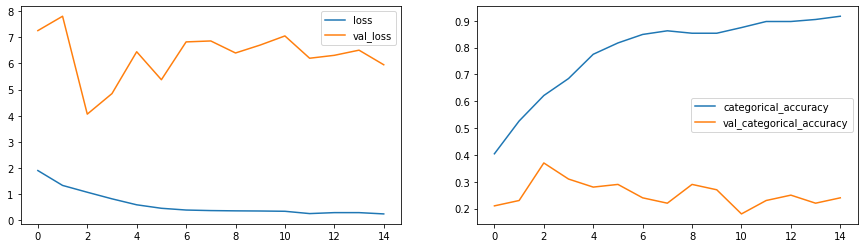

In [19]:
plot(history_model_a)

# Model_b  Adding more layers

In [20]:
train_doc = np.random.permutation(open('datasets/Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('datasets/Project_data/val.csv').readlines())
batch_size = 40 #experiment with the batch size

In [21]:
train_doc.size

663

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [22]:
def generator(source_path, folder_list, batch_size):
    x = 20 # number of frames
    y = 160 # image width
    z = 160 # image height

    print( 'Source path = ', source_path, '; batch size =', batch_size)
    img_idx = np.round(np.linspace(0,30-1,20)).astype(int) #create a list of image numbers you want to use for a particular video
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(t)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes

                    temp = cv2.resize(image,(160,160))

                    
                    batch_data[folder,idx,:,:,0] = (temp[:,:,0])/255 #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = (temp[:,:,1])/255 #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = (temp[:,:,2])/255 #normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        remaining_seq=len(t)%batch_size
        
        if (remaining_seq != 0):
            #print("Batch: ",num_batches+1,"Index:", batch_size)
            batch_size_1 = remaining_seq
            batch_data = np.zeros((batch_size_1,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size_1,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size_1): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch_size_1*batch)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch_size_1*batch)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    temp = cv2.resize(image,(160,160))
          
                    
                    batch_data[folder,idx,:,:,0] = (temp[:,:,0])/255
                    batch_data[folder,idx,:,:,1] = (temp[:,:,1])/255
                    batch_data[folder,idx,:,:,2] = (temp[:,:,2])/255
                   
                batch_labels[folder, int(t[folder + (batch*batch_size_1)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels
        
        # write the code for the remaining data points which are left after full batches


Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [23]:
curr_dt_time = datetime.datetime.now()
train_path = 'datasets/Project_data/train'
val_path = 'datasets/Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 15 # choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 15


## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [24]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation,Dropout
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam,SGD

#write your model here
model_b = Sequential()

model_b.add(Conv3D(16, #number of filters 
                 kernel_size=(3,3,3), 
                 input_shape=(20, 160, 160, 3),
                 padding='same'))
model_b.add(BatchNormalization())
model_b.add(Activation('elu'))
model_b.add(MaxPooling3D(pool_size=(2,2,2)))


model_b.add(Conv3D(32, #Number of filters, 
                 kernel_size=(3,3,3), 
                 padding='same'))
model_b.add(BatchNormalization())
model_b.add(Activation('elu'))


model_b.add(Conv3D(32, #Number of filters, 
                 kernel_size=(3,3,3), 
                 padding='same'))
model_b.add(BatchNormalization())
model_b.add(Activation('elu'))
model_b.add(MaxPooling3D(pool_size=(2,2,2)))


model_b.add(Conv3D(64, #Number of filters 
                 kernel_size=(3,3,3), 
                 padding='same'))
model_b.add(BatchNormalization())
model_b.add(Activation('elu'))



model_b.add(Conv3D(64, #Number of filters 
                 kernel_size=(3,3,3), 
                 padding='same'))
model_b.add(BatchNormalization())
model_b.add(Activation('elu'))
model_b.add(MaxPooling3D(pool_size=(2,2,2)))


model_b.add(Conv3D(128, #Number pf filters 
                 kernel_size=(3,3,3), 
                 padding='same'))
model_b.add(BatchNormalization())
model_b.add(Activation('elu'))


model_b.add(Conv3D(128, #Number pf filters 
                 kernel_size=(3,3,3), 
                 padding='same'))
model_b.add(BatchNormalization())
model_b.add(Activation('elu'))
model_b.add(MaxPooling3D(pool_size=(2,2,2)))


#Flatten Layers
model_b.add(Flatten())
model_b.add(Dropout(0.5))

model_b.add(Dense(256, activation='elu'))
model_b.add(BatchNormalization())
model_b.add(Dropout(0.5))

model_b.add(Dense(128, activation='elu'))
model_b.add(BatchNormalization())
model_b.add(Dropout(0.5))

model_b.add(Dense(64, activation='elu'))
model_b.add(BatchNormalization())
model_b.add(Dropout(0.5))

model_b.add(Dense(5, activation='softmax'))

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [25]:
optimiser = Adam(lr=0.001)
model_b.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_b.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_8 (Conv3D)           (None, 20, 160, 160, 16)  1312      
                                                                 
 batch_normalization_12 (Bat  (None, 20, 160, 160, 16)  64       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 20, 160, 160, 16)  0         
                                                                 
 max_pooling3d_8 (MaxPooling  (None, 10, 80, 80, 16)   0         
 3D)                                                             
                                                                 
 conv3d_9 (Conv3D)           (None, 10, 80, 80, 32)    13856     
                                                                 
 batch_normalization_13 (Bat  (None, 10, 80, 80, 32)  

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

In [26]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [27]:
folder_path = 'Model_b/'

#folder_path=creat_folder(path,'Model_1')
model_name = folder_path+'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 4,
  verbose = 1)
callbacks_list = [checkpoint, LR]

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [28]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [29]:
history_model_b=model_b.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_402/1990127571.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_model_b=model_b.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Source path =  datasets/Project_data/train ; batch size = 40
Epoch 1/15
17/17 [==============================] - ETA: 0s - loss: 2.2688 - categorical_accuracy: 0.3258Source path =  datasets/Project_data/val ; batch size = 40

Epoch 00001: saving model to Model_b/model_init_2022-06-1416_59_04.299188/model-00001-2.26876-0.32579-22.36950-0.26000.h5
17/17 [==============================] - 43s 2s/step - loss: 2.2688 - categorical_accuracy: 0.3258 - val_loss: 22.3695 - val_categorical_accuracy: 0.2600 - lr: 0.0010
Epoch 2/15
17/17 [==============================] - ETA: 0s - loss: 1.7077 - categorical_accuracy: 0.4118
Epoch 00002: saving model to Model_b/model_init_2022-06-1416_59_04.299188/model-00002-1.70766-0.41176-7.16520-0.30000.h5
17/17 [==============================] - 40s 2s/step - loss: 1.7077 - categorical_accuracy: 0.4118 - val_loss: 7.1652 - val_categorical_accuracy: 0.3000 - lr: 0.0010
Epoch 3/15
17/17 [==============================] - ETA: 0s - loss: 1.6382 - categorical_acc

In [30]:
def plot(history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
    axes[0].plot(history.history['loss'])   
    axes[0].plot(history.history['val_loss'])
    axes[0].legend(['loss','val_loss'])

    axes[1].plot(history.history['categorical_accuracy'])   
    axes[1].plot(history.history['val_categorical_accuracy'])
    axes[1].legend(['categorical_accuracy','val_categorical_accuracy'])

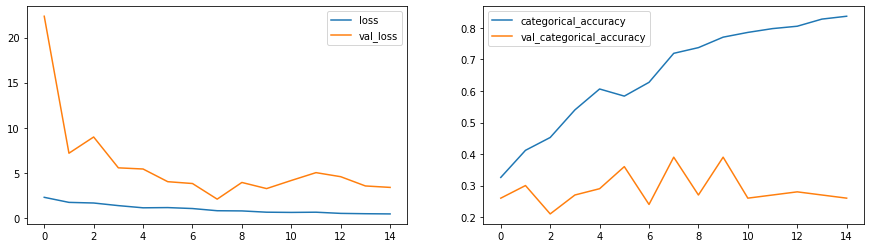

In [31]:
plot(history_model_b)

# Model_c Using Augmentation

In [32]:
train_doc = np.random.permutation(open('datasets/Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('datasets/Project_data/val.csv').readlines())
batch_size = 20 #experiment with the batch size

In [33]:
def generator(source_path, folder_list, batch_size,augment=False):
    x = 20 # number of frames
    y = 160 # image width
    z = 160 # image height

    print( 'Source path = ', source_path, '; batch size =', batch_size)
    img_idx = np.round(np.linspace(0,30-1,20)).astype(int) #create a list of image numbers you want to use for a particular video
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(folder_list)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output

            if (augment): batch_data_aug = np.zeros((batch_size,x,y,z,3))

            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes

                    image_resized = cv2.resize(image,(160,160))

                    
                    batch_data[folder,idx,:,:,0] = (image_resized[:,:,0])/255 #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = (image_resized[:,:,1])/255 #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = (image_resized[:,:,2])/255 #normalise and feed in the image
                    
                    if (augment):
                      shifted = cv2.warpAffine(image, 
                                              np.float32([[1, 0, np.random.randint(-30,30)],[0, 1, np.random.randint(-30,30)]]), 
                                              (image.shape[1], image.shape[0]))
                      
                      gray = cv2.cvtColor(shifted,cv2.COLOR_BGR2GRAY)

                      x0, y0 = np.argwhere(gray > 0).min(axis=0)
                      x1, y1 = np.argwhere(gray > 0).max(axis=0) 
                      
                      cropped=shifted[x0:x1,y0:y1,:]
                      
                      image_resized=cv2.resize(cropped,(160,160))
                      
                      
                      batch_data_aug[folder,idx,:,:,0] = (image_resized[:,:,0])/255
                      batch_data_aug[folder,idx,:,:,1] = (image_resized[:,:,1])/255
                      batch_data_aug[folder,idx,:,:,2] = (image_resized[:,:,2])/255

                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1

            if (augment):
              batch_data=np.concatenate([batch_data,batch_data_aug])
              batch_labels=np.concatenate([batch_labels,batch_labels])

            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        remaining_seq=len(t)%batch_size
        
        if (remaining_seq != 0):
            #print("Batch: ",num_batches+1,"Index:", batch_size)
            batch_size_1 = remaining_seq
            batch_data = np.zeros((batch_size_1,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size_1,5)) # batch_labels is the one hot representation of the output

            if (augment): batch_data_aug = np.zeros((batch_size_1,x,y,z,3))

            for folder in range(batch_size_1): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size_1)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch*batch_size_1)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    image_resized = cv2.resize(image,(160,160))
          
                    
                    batch_data[folder,idx,:,:,0] = (image_resized[:,:,0])/255
                    batch_data[folder,idx,:,:,1] = (image_resized[:,:,1])/255
                    batch_data[folder,idx,:,:,2] = (image_resized[:,:,2])/255

                    if (augment):
                      shifted = cv2.warpAffine(image, 
                                              np.float32([[1, 0, np.random.randint(-30,30)],[0, 1, np.random.randint(-30,30)]]), 
                                              (image.shape[1], image.shape[0]))
                      
                      gray = cv2.cvtColor(shifted,cv2.COLOR_BGR2GRAY)

                      x0, y0 = np.argwhere(gray > 0).min(axis=0)
                      x1, y1 = np.argwhere(gray > 0).max(axis=0) 
                      
                      cropped=shifted[x0:x1,y0:y1,:]
                      
                      image_resized=cv2.resize(cropped,(160,160))
                      
                      
                      batch_data_aug[folder,idx,:,:,0] = (image_resized[:,:,0])/255
                      batch_data_aug[folder,idx,:,:,1] = (image_resized[:,:,1])/255
                      batch_data_aug[folder,idx,:,:,2] = (image_resized[:,:,2])/255
                   
                batch_labels[folder, int(t[folder + (batch*batch_size_1)].strip().split(';')[2])] = 1

            if (augment):
              batch_data=np.concatenate([batch_data,batch_data_aug])
              batch_labels=np.concatenate([batch_labels,batch_labels])
            yield batch_data, batch_labels


In [34]:
curr_dt_time = datetime.datetime.now()
train_path = 'datasets/Project_data/train/'
val_path = 'datasets/Project_data/val/'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 15 # choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 15


In [35]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation,Dropout
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

#write your model here
model_c = Sequential()

model_c.add(Conv3D(16, #number of filters 
                 kernel_size=(3,3,3), 
                 input_shape=(20, 160, 160, 3),
                 padding='same'))
model_c.add(BatchNormalization())
model_c.add(Activation('elu'))
model_c.add(MaxPooling3D(pool_size=(2,2,2)))


model_c.add(Conv3D(32, #Number of filters, 
                 kernel_size=(3,3,3), 
                 padding='same'))
model_c.add(BatchNormalization())
model_c.add(Activation('elu'))
model_c.add(MaxPooling3D(pool_size=(2,2,2)))


model_c.add(Conv3D(64, #Number of filters 
                 kernel_size=(3,3,3), 
                 padding='same'))
model_c.add(BatchNormalization())
model_c.add(Activation('elu'))
model_c.add(MaxPooling3D(pool_size=(2,2,2)))


model_c.add(Conv3D(128, #Number pf filters 
                 kernel_size=(3,3,3), 
                 padding='same'))
model_c.add(BatchNormalization())
model_c.add(Activation('elu'))
model_c.add(MaxPooling3D(pool_size=(2,2,2)))


#Flatten Layers
model_c.add(Flatten())

model_c.add(Dense(64, activation='elu'))
model_c.add(BatchNormalization())
model_c.add(Dropout(0.5))

model_c.add(Dense(64, activation='elu'))
model_c.add(BatchNormalization())
model_c.add(Dropout(0.5))

model_c.add(Dense(5, activation='softmax'))

In [36]:
optimiser = Adam(learning_rate=0.001)
model_c.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_c.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_15 (Conv3D)          (None, 20, 160, 160, 16)  1312      
                                                                 
 batch_normalization_22 (Bat  (None, 20, 160, 160, 16)  64       
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 20, 160, 160, 16)  0         
                                                                 
 max_pooling3d_12 (MaxPoolin  (None, 10, 80, 80, 16)   0         
 g3D)                                                            
                                                                 
 conv3d_16 (Conv3D)          (None, 10, 80, 80, 32)    13856     
                                                                 
 batch_normalization_23 (Bat  (None, 10, 80, 80, 32)  

In [37]:
train_generator = generator(train_path, train_doc, batch_size,augment=True)
val_generator = generator(val_path, val_doc, batch_size,augment=True)

In [38]:
folder_path = 'Model_c/'

#folder_path=creat_folder(path,'Model_1')
model_name = folder_path+'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 0, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

In [39]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [40]:
history_model_c=model_c.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_402/390499466.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_model_c=model_c.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Source path =  datasets/Project_data/train/ ; batch size = 20
Epoch 1/15
34/34 [==============================] - ETA: 0s - loss: 1.9087 - categorical_accuracy: 0.3635Source path =  datasets/Project_data/val/ ; batch size = 20

Epoch 00001: saving model to Model_c/model_init_2022-06-1417_09_33.969929/model-00001-1.90868-0.36350-1.84329-0.33000.h5
34/34 [==============================] - 92s 3s/step - loss: 1.9087 - categorical_accuracy: 0.3635 - val_loss: 1.8433 - val_categorical_accuracy: 0.3300 - lr: 0.0010
Epoch 2/15
34/34 [==============================] - ETA: 0s - loss: 1.4653 - categorical_accuracy: 0.4849
Epoch 00002: saving model to Model_c/model_init_2022-06-1417_09_33.969929/model-00002-1.46526-0.48492-3.00835-0.18500.h5
34/34 [==============================] - 89s 3s/step - loss: 1.4653 - categorical_accuracy: 0.4849 - val_loss: 3.0083 - val_categorical_accuracy: 0.1850 - lr: 0.0010
Epoch 3/15
34/34 [==============================] - ETA: 0s - loss: 1.1555 - categorical_acc

In [41]:
def plot(history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
    axes[0].plot(history.history['loss'])   
    axes[0].plot(history.history['val_loss'])
    axes[0].legend(['loss','val_loss'])

    axes[1].plot(history.history['categorical_accuracy'])   
    axes[1].plot(history.history['val_categorical_accuracy'])
    axes[1].legend(['categorical_accuracy','val_categorical_accuracy'])

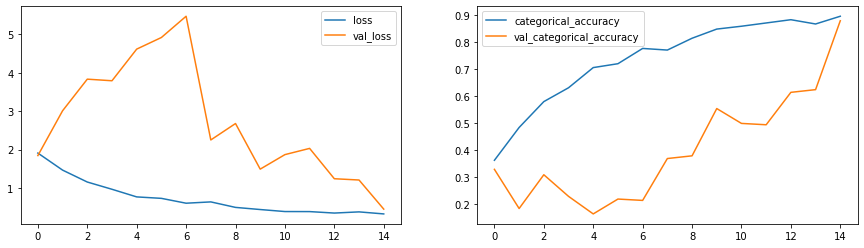

In [42]:
plot(history_model_c)

# Using CONV2D + LSTM

In [3]:
train_doc = np.random.permutation(open('datasets/Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('datasets/Project_data/val.csv').readlines())
batch_size = 30 #experiment with the batch size

In [4]:
def generator(source_path, folder_list, batch_size):
    x = 20 # number of frames
    y = 160 # image width
    z = 160 # image height

    print( 'Source path = ', source_path, '; batch size =', batch_size)
    img_idx = np.round(np.linspace(0,30-1,20)).astype(int) #create a list of image numbers you want to use for a particular video
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(t)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes

                    temp = cv2.resize(image,(160,160))

                    
                    batch_data[folder,idx,:,:,0] = (temp[:,:,0])/255 #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = (temp[:,:,1])/255 #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = (temp[:,:,2])/255 #normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        remaining_seq=len(t)%batch_size
        
        if (remaining_seq != 0):
            #print("Batch: ",num_batches+1,"Index:", batch_size)
            batch_size_1 = remaining_seq
            batch_data = np.zeros((batch_size_1,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size_1,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size_1): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch_size_1*batch)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch_size_1*batch)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    temp = cv2.resize(image,(160,160))
          
                    
                    batch_data[folder,idx,:,:,0] = (temp[:,:,0])/255
                    batch_data[folder,idx,:,:,1] = (temp[:,:,1])/255
                    batch_data[folder,idx,:,:,2] = (temp[:,:,2])/255
                   
                batch_labels[folder, int(t[folder + (batch*batch_size_1)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels
        
        # write the code for the remaining data points which are left after full batches


In [5]:
curr_dt_time = datetime.datetime.now()
train_path = 'datasets/Project_data/train/'
val_path = 'datasets/Project_data/val/'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 15 # choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 15


In [8]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation,Dropout,LSTM
from keras.layers.convolutional import Conv3D,Conv2D, MaxPooling3D,MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

#write your model here

model_d = Sequential()

model_d.add(TimeDistributed(Conv2D(16, (3, 3) , padding='same', activation='relu'),
                          input_shape=(20,160,160,3)))
model_d.add(TimeDistributed(BatchNormalization()))
model_d.add(TimeDistributed(MaxPooling2D((2, 2))))

model_d.add(TimeDistributed(Conv2D(32, (3, 3) , padding='same', activation='relu')))
model_d.add(TimeDistributed(BatchNormalization()))
model_d.add(TimeDistributed(MaxPooling2D((2, 2))))

model_d.add(TimeDistributed(Conv2D(64, (3, 3) , padding='same', activation='relu')))
model_d.add(TimeDistributed(BatchNormalization()))
model_d.add(TimeDistributed(MaxPooling2D((2, 2))))

model_d.add(TimeDistributed(Conv2D(128, (3, 3) , padding='same', activation='relu')))
model_d.add(TimeDistributed(BatchNormalization()))
model_d.add(TimeDistributed(MaxPooling2D((2, 2))))


model_d.add(TimeDistributed(Flatten()))


model_d.add(GRU(64))
model_d.add(Dropout(0.5))



model_d.add(Dense(64,activation='relu'))
model_d.add(Dropout(0.5))

model_d.add(Dense(5, activation='softmax'))


In [9]:
optimiser = Adam(learning_rate=0.001)
model_d.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_d.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_13 (TimeDi  (None, 20, 160, 160, 16)  448      
 stributed)                                                      
                                                                 
 time_distributed_14 (TimeDi  (None, 20, 160, 160, 16)  64       
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 20, 80, 80, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_16 (TimeDi  (None, 20, 80, 80, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 20, 80, 80, 32)  

In [10]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [11]:
folder_path = 'Model_d/'

#folder_path=creat_folder(path,'Model_1')
model_name = folder_path+'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 0, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

In [12]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [13]:
history_model_d=model_d.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_418/2697237188.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_model_d=model_d.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Source path =  datasets/Project_data/train/ ; batch size = 30
Epoch 1/15


2022-06-14 18:38:25.045074: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


23/23 [==============================] - ETA: 0s - loss: 2.0064 - categorical_accuracy: 0.2036Source path =  datasets/Project_data/val/ ; batch size = 30

Epoch 00001: saving model to Model_d/model_init_2022-06-1418_37_41.125926/model-00001-2.00645-0.20362-3.29889-0.20000.h5
23/23 [==============================] - 44s 2s/step - loss: 2.0064 - categorical_accuracy: 0.2036 - val_loss: 3.2989 - val_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 2/15
23/23 [==============================] - ETA: 0s - loss: 1.7591 - categorical_accuracy: 0.2232
Epoch 00002: saving model to Model_d/model_init_2022-06-1418_37_41.125926/model-00002-1.75911-0.22323-2.60915-0.23000.h5
23/23 [==============================] - 38s 2s/step - loss: 1.7591 - categorical_accuracy: 0.2232 - val_loss: 2.6092 - val_categorical_accuracy: 0.2300 - lr: 0.0010
Epoch 3/15
23/23 [==============================] - ETA: 0s - loss: 1.6960 - categorical_accuracy: 0.2308
Epoch 00003: saving model to Model_d/model_init_2022-06-141

In [14]:
def plot(history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
    axes[0].plot(history.history['loss'])   
    axes[0].plot(history.history['val_loss'])
    axes[0].legend(['loss','val_loss'])

    axes[1].plot(history.history['categorical_accuracy'])   
    axes[1].plot(history.history['val_categorical_accuracy'])
    axes[1].legend(['categorical_accuracy','val_categorical_accuracy'])

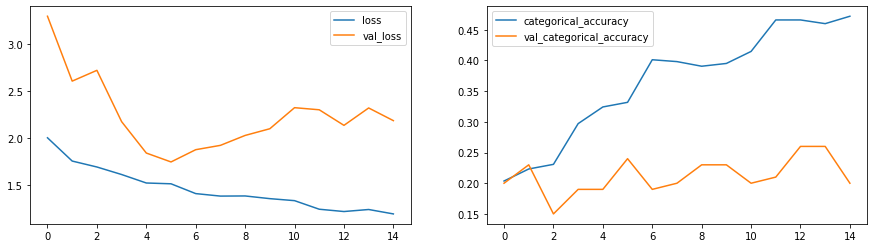

In [15]:
plot(history_model_d)

# Using Transfer Learning

In [16]:
train_doc = np.random.permutation(open('datasets/Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('datasets/Project_data/val.csv').readlines())
batch_size = 30 #experiment with the batch size

In [17]:
def generator(source_path, folder_list, batch_size):
    x = 20 # number of frames
    y = 160 # image width
    z = 160 # image height

    print( 'Source path = ', source_path, '; batch size =', batch_size)
    img_idx = np.round(np.linspace(0,30-1,20)).astype(int) #create a list of image numbers you want to use for a particular video
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(t)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes

                    temp = cv2.resize(image,(160,160))

                    
                    batch_data[folder,idx,:,:,0] = (temp[:,:,0])/255 #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = (temp[:,:,1])/255 #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = (temp[:,:,2])/255 #normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        remaining_seq=len(t)%batch_size
        
        if (remaining_seq != 0):
            #print("Batch: ",num_batches+1,"Index:", batch_size)
            batch_size_1 = remaining_seq
            batch_data = np.zeros((batch_size_1,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size_1,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size_1): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch_size_1*batch)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch_size_1*batch)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    temp = cv2.resize(image,(160,160))
          
                    
                    batch_data[folder,idx,:,:,0] = (temp[:,:,0])/255
                    batch_data[folder,idx,:,:,1] = (temp[:,:,1])/255
                    batch_data[folder,idx,:,:,2] = (temp[:,:,2])/255
                   
                batch_labels[folder, int(t[folder + (batch*batch_size_1)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels
        
        # write the code for the remaining data points which are left after full batches


In [18]:
curr_dt_time = datetime.datetime.now()
train_path = 'datasets/Project_data/train/'
val_path = 'datasets/Project_data/val/'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 15 # choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 15


In [21]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation,Dropout,LSTM
from keras.layers.convolutional import Conv3D,Conv2D, MaxPooling3D,MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.applications import mobilenet

#write your model here
mobilenet_transfer = mobilenet.MobileNet(weights='imagenet', include_top=False)
model_e = Sequential()
model_e.add(TimeDistributed(mobilenet_transfer,input_shape=(20,160,160,3)))


for layer in model_e.layers:
        layer.trainable = False
        
model_e.add(TimeDistributed(BatchNormalization()))
model_e.add(TimeDistributed(MaxPooling2D((2, 2))))
model_e.add(TimeDistributed(Flatten()))

model_e.add(LSTM(64))
model_e.add(Dropout(0.5))

model_e.add(Dense(64,activation='relu'))
model_e.add(Dropout(0.5))

model_e.add(Dense(32,activation='relu'))
model_e.add(Dropout(0.5))

model_e.add(Dense(5, activation='softmax'))


In [22]:
optimiser = Adam(learning_rate=0.001)
model_e.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_e.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_30 (TimeDi  (None, 20, 5, 5, 1024)   3228864   
 stributed)                                                      
                                                                 
 time_distributed_31 (TimeDi  (None, 20, 5, 5, 1024)   4096      
 stributed)                                                      
                                                                 
 time_distributed_32 (TimeDi  (None, 20, 2, 2, 1024)   0         
 stributed)                                                      
                                                                 
 time_distributed_33 (TimeDi  (None, 20, 4096)         0         
 stributed)                                                      
                                                                 
 lstm_1 (LSTM)               (None, 64)               

In [23]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [24]:
folder_path = 'Model_e/'

#folder_path=creat_folder(path,'Model_1')
model_name = folder_path+'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 4,
  verbose = 0, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

In [25]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [26]:
history_model_e=model_e.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_418/3545959283.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_model_e=model_e.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Source path =  datasets/Project_data/train/ ; batch size = 30
Epoch 1/15
23/23 [==============================] - ETA: 0s - loss: 1.7241 - categorical_accuracy: 0.2006Source path =  datasets/Project_data/val/ ; batch size = 30

Epoch 00001: saving model to Model_e/model_init_2022-06-1418_50_26.073167/model-00001-1.72410-0.20060-1.59702-0.20000.h5
23/23 [==============================] - 43s 2s/step - loss: 1.7241 - categorical_accuracy: 0.2006 - val_loss: 1.5970 - val_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 2/15
23/23 [==============================] - ETA: 0s - loss: 1.6067 - categorical_accuracy: 0.2459
Epoch 00002: saving model to Model_e/model_init_2022-06-1418_50_26.073167/model-00002-1.60668-0.24585-1.57753-0.42000.h5
23/23 [==============================] - 38s 2s/step - loss: 1.6067 - categorical_accuracy: 0.2459 - val_loss: 1.5775 - val_categorical_accuracy: 0.4200 - lr: 0.0010
Epoch 3/15
22/23 [===========================>..] - ETA: 1s - loss: 1.5905 - categorical_acc

In [29]:
def plot(history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
    axes[0].plot(history.history['loss'])   
    axes[0].plot(history.history['val_loss'])
    axes[0].legend(['loss','val_loss'])

    axes[1].plot(history.history['categorical_accuracy'])   
    axes[1].plot(history.history['val_categorical_accuracy'])
    axes[1].legend(['categorical_accuracy','val_categorical_accuracy'])

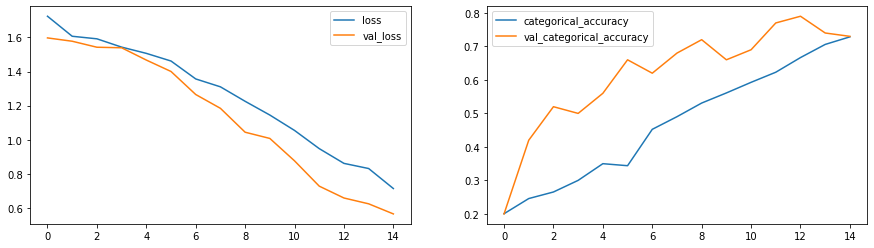

In [28]:
plot(history_model_e)